# ChestX-ray 14 EDA
## Madison Moffat-Wild and Rachel Woodside

### https://paperswithcode.com/dataset/chestx-ray14
### https://www.kaggle.com/datasets/nih-chest-xrays/data/data



## Step 1: Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Step 2: Load in Data

Zip file contains 2 csv files: BBox_List 2017.csv and Data_Entry_2017.csv,
12 folders of images, 2 pre split lists for training and testing: test_list.txt and train_val_list.txt

### Optional: Download using kaggle command

In [4]:
#!kaggle datasets download -d nih-chest-xrays/data

### Store path to data folder

In [5]:
#data_folder = "~/ChestXray14Data/"
data_folder = "data/"

## Step 3: Explore Bounding Box CSV Data
Limited number of bounding boxes, not a comprehensive list of dataset

In [6]:
bbox = pd.read_csv(data_folder+'BBox_List_2017.csv', delimiter = ',')         

In [7]:
bbox.head()

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


In [8]:
bbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Index    984 non-null    object 
 1   Finding Label  984 non-null    object 
 2   Bbox [x        984 non-null    float64
 3   y              984 non-null    float64
 4   w              984 non-null    float64
 5   h]             984 non-null    float64
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     0 non-null      float64
 8   Unnamed: 8     0 non-null      float64
dtypes: float64(7), object(2)
memory usage: 69.3+ KB


In [9]:
bbox.isna().sum()

Image Index        0
Finding Label      0
Bbox [x            0
y                  0
w                  0
h]                 0
Unnamed: 6       984
Unnamed: 7       984
Unnamed: 8       984
dtype: int64

In [10]:
bbox.drop(['Unnamed: 6','Unnamed: 7', 'Unnamed: 8'], axis=1,inplace=True)

In [11]:
bbox.head()

,Image Index,Finding Label,Bbox [x,y,w,h]
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695


In [12]:
bbox['Finding Label'].value_counts()

Finding Label
Atelectasis     180
Effusion        153
Cardiomegaly    146
Infiltrate      123
Pneumonia       120
Pneumothorax     98
Mass             85
Nodule           79
Name: count, dtype: int64

[Text(0, 0, 'Atelectasis'),
 Text(1, 0, 'Cardiomegaly'),
 Text(2, 0, 'Effusion'),
 Text(3, 0, 'Infiltrate'),
 Text(4, 0, 'Mass'),
 Text(5, 0, 'Nodule'),
 Text(6, 0, 'Pneumonia'),
 Text(7, 0, 'Pneumothorax')]

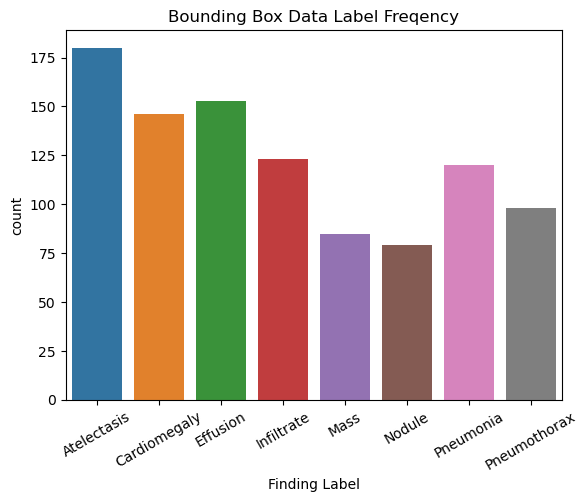

In [13]:
p = sns.countplot(bbox, x='Finding Label')
p.set(title='Bounding Box Data Label Freqency')
p.set_xticklabels(p.get_xticklabels(), rotation=30)

## Step 4: Explore Data Entry CSV

Class labels and patient data for entire dataset

In [14]:
dataEntry = pd.read_csv(data_folder+'Data_Entry_2017.csv', delimiter = ',')

In [15]:
dataEntry.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [16]:
dataEntry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


In [17]:
dataEntry.drop(['Unnamed: 11'],axis=1,inplace=True)

In [18]:
dataEntry.isna().sum()

Image Index                    0
Finding Labels                 0
Follow-up #                    0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImage[Width            0
Height]                        0
OriginalImagePixelSpacing[x    0
y]                             0
dtype: int64

In [19]:
dataEntry.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


### Determine Classification Label Distribution

In [20]:
dataEntry['Finding Labels'].value_counts()

Finding Labels
No Finding                                                         60361
Infiltration                                                        9547
Atelectasis                                                         4215
Effusion                                                            3955
Nodule                                                              2705
                                                                   ...  
Atelectasis|Consolidation|Edema|Effusion|Infiltration|Pneumonia        1
Atelectasis|Consolidation|Effusion|Emphysema|Mass|Pneumothorax         1
Cardiomegaly|Effusion|Pleural_Thickening|Pneumothorax                  1
Edema|Infiltration|Pneumothorax                                        1
Atelectasis|Consolidation|Mass|Pleural_Thickening|Pneumothorax         1
Name: count, Length: 836, dtype: int64

<b>Some images have multiple disease labels so we change frequencies to account for this</b>

In [21]:
labels = pd.Series(dataEntry['Finding Labels'].str.split('|').sum()).value_counts()
labels

No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64

<Axes: title={'center': 'Label Frequency for Data Entry'}>

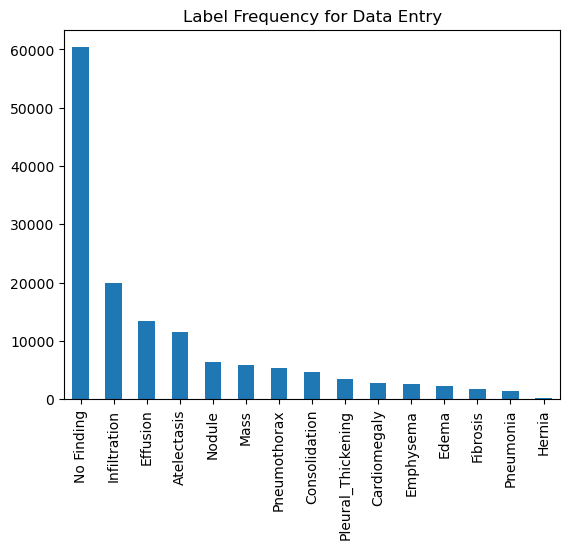

In [22]:
labels.plot(kind="bar", title='Label Frequency for Data Entry')

### Feature 1: Follow Up Number

In [23]:
followups = dataEntry['Follow-up #'].value_counts(bins=[0,5,10,20,50,100,150,190])
followups

Follow-up #
(-0.001, 5.0]     70965
(5.0, 10.0]       15162
(10.0, 20.0]      12589
(20.0, 50.0]      10293
(50.0, 100.0]      2619
(100.0, 150.0]      424
(150.0, 190.0]       68
Name: count, dtype: int64

<Axes: title={'center': 'Binned freqency of Follow ups'}, xlabel='Follow-up #'>

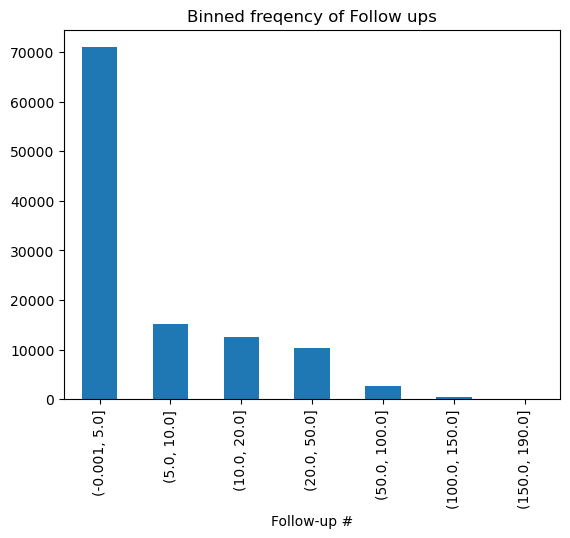

In [24]:
followups.plot(kind='bar',title = 'Binned freqency of Follow ups')

In [25]:
followups2 = dataEntry['Follow-up #'].value_counts(bins=[0,1,2,3,4,5,10,50,190])
followups2

Follow-up #
(-0.001, 1.0]    44107
(10.0, 50.0]     22882
(5.0, 10.0]      15162
(1.0, 2.0]        9189
(2.0, 3.0]        7089
(3.0, 4.0]        5759
(4.0, 5.0]        4821
(50.0, 190.0]     3111
Name: count, dtype: int64

<Axes: title={'center': 'Binned freqency of Follow ups'}, xlabel='Follow-up #'>

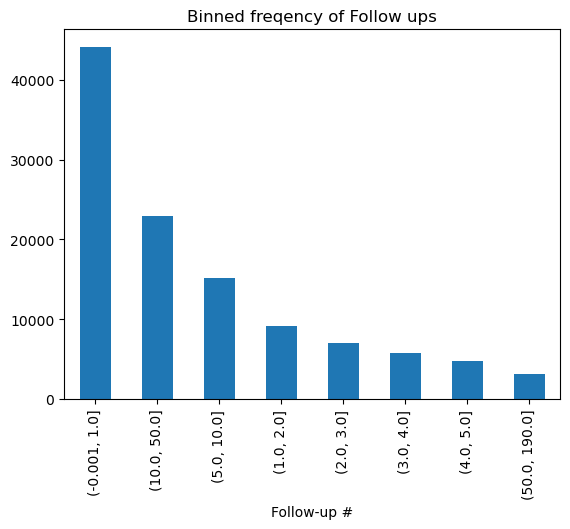

In [26]:
followups2.plot(kind='bar',title = 'Binned freqency of Follow ups')

### Feature 2: Patient Gender

<Axes: xlabel='Patient Gender', ylabel='count'>

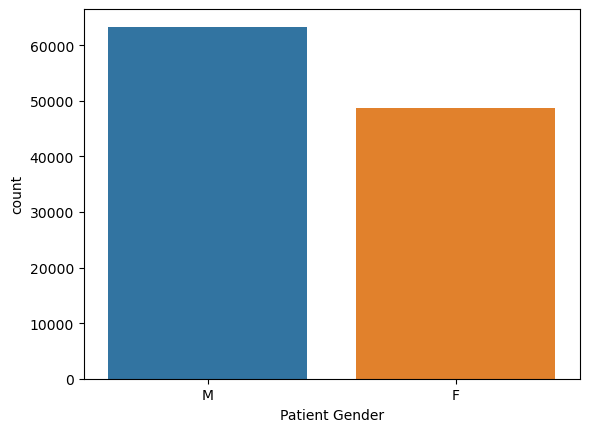

In [27]:
sns.countplot(dataEntry, x='Patient Gender')

### Feature 3: Patient Age

In [28]:
age = dataEntry['Patient Age'].value_counts()
age

Patient Age
58     3209
56     2916
52     2891
55     2830
57     2771
       ... 
151       1
411       1
413       1
153       1
154       1
Name: count, Length: 107, dtype: int64

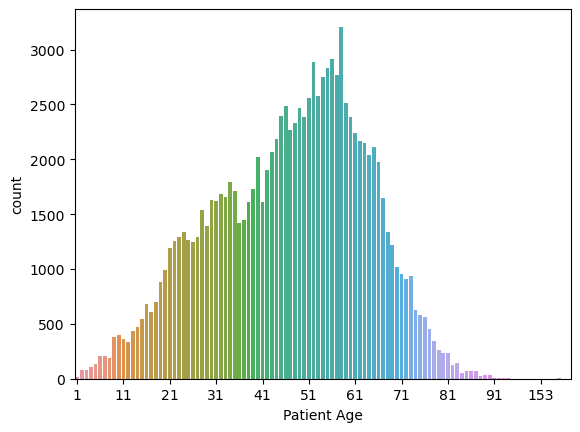

In [29]:
p = sns.countplot(dataEntry, x='Patient Age')
p.xaxis.set_major_locator(ticker.MultipleLocator(10))

We can see some age outliers that need removing or altering

### Feature 4: View Position

<Axes: xlabel='View Position', ylabel='count'>

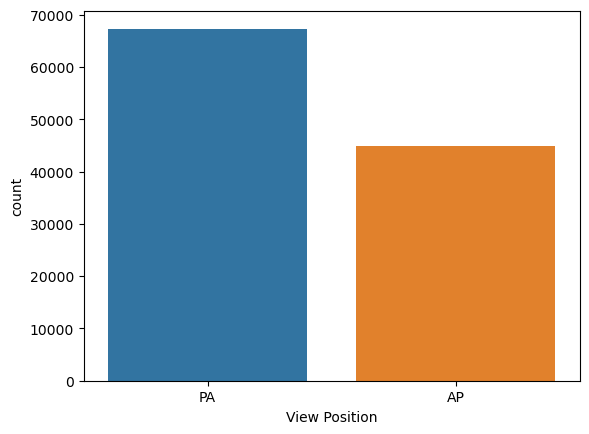

In [30]:
sns.countplot(dataEntry, x='View Position')

## Step 5: Explore Image-related Features

### Image Width and Height

In [31]:
dataEntry.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800


In [34]:
dataEntry.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]'],
      dtype='object')

<Axes: xlabel='OriginalImage[Width', ylabel='Height]'>

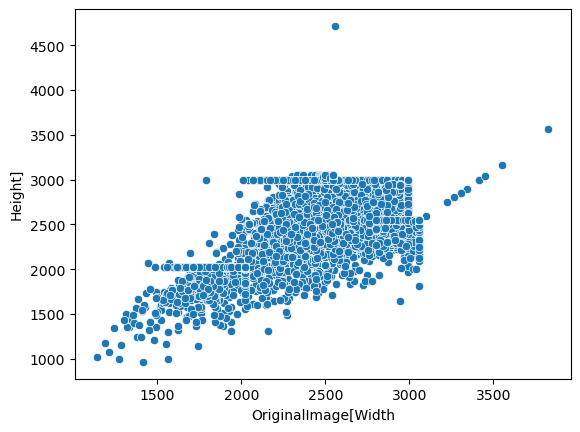

In [36]:
sns.scatterplot(dataEntry, x="OriginalImage[Width", y="Height]")

### Sample Random Images

In [ ]:
# TODO

### Compute Mean Image

In [ ]:
# TODO

##### resources

https://seaborn.pydata.org/generated/seaborn.countplot.html
https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html